Basic Version

In [142]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [143]:
# Read the CSV file online
df_url = "https://raw.githubusercontent.com/verneylmavt/2D_Project_Term-3/main/2D_Data-Set_Cambodia-Myanmar.csv"
df = pd.read_csv(df_url)

In [144]:
# 7 Columns, 4 Features & 1 Tragets with 2 additional columns as a Description
# 40 Rows, 2001-2020 Cambodia & 2001-2020 Myanmar
display(df)
print(df.shape)

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Gross per capita Production Index Number (2014-2016 = 100)
0,Cambodia,2001,23.6,0,321.150224,-0.600648,52.79
1,Cambodia,2002,21.2,0,338.987477,0.211467,49.46
2,Cambodia,2003,19.4,0,362.335482,0.941746,57.65
3,Cambodia,2004,18.5,0,408.513639,4.319337,53.83
4,Cambodia,2005,17.0,0,474.111192,6.615259,68.71
5,Cambodia,2006,15.6,0,539.750329,5.810686,73.50
6,Cambodia,2007,14.8,0,631.525258,8.708828,75.90
7,Cambodia,2008,14.5,0,745.609127,24.096852,81.68
8,Cambodia,2009,13.0,0,738.054731,-1.241718,84.33
9,Cambodia,2010,11.2,0,785.502700,4.000000,89.31


(40, 7)


In [145]:
# List of all columns
print(list(df.columns))

['Country', 'Year', 'Percentage of Undernourishment Prevalence (3-Year Average)', 'Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Gross per capita Production Index Number (2014-2016 = 100)']


In [146]:
# Preparation Functions
def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return pd.DataFrame(df_feature), pd.DataFrame(df_target)


def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    df_feature_rows, df_feature_columns = df_feature.shape
    array_all = list(range(0, df_feature_rows))
    
    np.random.seed(random_state)
    array_test = list(np.random.choice(array_all, int((df_feature_rows)*test_size), replace=False))
    array_train = [i for i in array_all if i not in array_test]
    
    df_feature_test = df_feature.iloc[array_test, :]
    df_feature_train = df_feature.iloc[array_train, :]
    df_target_test = df_target.iloc[array_test, :]
    df_target_train = df_target.iloc[array_train, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test


def normalize_z(dfin):
    mean = dfin.mean(axis=0)
    sd = dfin.std(axis=0)
    dfout = ((dfin.copy())-mean)/sd
    return dfout


def prepare_feature(df_feature):
    matrix_feature = (df_feature.copy()).to_numpy()
    matrix_one = np.ones([len(df_feature), 1])
    matrix_feature = np.concatenate((matrix_one, matrix_feature), axis=1)
    return matrix_feature


def prepare_target(df_target):
    matrix_target = (df_target.copy()).to_numpy()
    return matrix_target

In [147]:
# Calculation Functions
def calc_linear(X, beta):
    beta_new_rows = int((X.size)/(len(X)))
    beta_new_columns = int((beta.size)/(beta_new_rows))
    beta = beta.reshape(beta_new_rows, beta_new_columns)
    return np.matmul(X, beta)


def compute_cost(X, y, beta):
    yhat = calc_linear(X, beta)
    yhat_y = yhat - y
    J = (np.matmul((yhat_y).T, yhat_y))/(2*len(X))
    return J


def gradient_descent(X, y, beta, alpha, num_iters):
    J_storage = np.array([])
    for i in range(num_iters):
        cost_value = (calc_linear(X.T, ((calc_linear(X,beta))-y)))/(len(X))
        beta = beta - alpha*cost_value
        J_storage = np.append(J_storage, cost_value)
    return beta, J_storage


def predict(df_feature, beta):
    df_feature_z = normalize_z(df_feature.copy())
    X = prepare_feature(df_feature_z)
    yhat = calc_linear(X, beta)
    return yhat


def linear_regression(X, y, alpha, iterations):
    beta = np.zeros(((X.shape[1]), 1))
    beta, J_storage = gradient_descent(X, y, beta, alpha, iterations)
    yhat = predict(X, beta)
    return beta, J_storage, yhat

In [148]:
# Metrics Functions
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ss_tot = np.sum(np.power((y-y_mean), 2))
    ss_res = np.sum(np.power(np.subtract(y, ypred), 2))
    return 1 - ((ss_res)/ss_tot)


def mean_squared_error(y, ypred):
    ss_res = np.sum(np.power(np.subtract(y, ypred), 2))
    mse = (ss_res)/(len(y))
    return mse


def adjusted_r2_score(y, ypred, p):
    r2 = r2_score(y,ypred)
    n = y.shape[0]
    return 1 - (((1-r2)*(n-1))/(n-p-1))


def std_dev_score(y, ypred):
    n = y.shape[0]
    return (np.sum(np.subtract(y, ypred))/(n-1))**(0.5)


def std_error_reg_score(y, ypred, p):
    adjusted_r2 = adjusted_r2_score(y, ypred, p)
    std_dev = std_dev_score(y, ypred)
    return ((1-adjusted_r2)**(0.5))*std_dev

In [149]:
# CATEGORY:
#'Country' 
#'Year'

# TARGET: 
#'Percentage of Undernourishment Prevalence (3-Year Average)'

# FEATURES: 
#'Binary Categorical'
# 'GDP per Capita (USD)'
# 'Annual Inflation Rate (%)' 
# 'Gross per capita Production Index Number (2014-2016 = 100)'

Preparing Dataset

In [150]:
# Extract the features and the target
features = ['Binary Categorical', 'GDP per Capita (USD)', 'Annual Inflation Rate (%)', 'Gross per capita Production Index Number (2014-2016 = 100)']
targets = ['Percentage of Undernourishment Prevalence (3-Year Average)']
df_features, df_target = get_features_targets(df, features, targets) #DataFrame

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.2) #DataFrame

# Normalize the features train using z normalization
df_features_train_z = normalize_z(df_features_train) #DataFrame

# Prepare the features train and target train to a NumPy
X = prepare_feature(df_features_train_z) #NumPy 5D
target = prepare_target(df_target_train) #NumPy 1D

In [151]:
# Display the Descriptive Statistics
display(df_features.describe())
display(df_target.describe())

,Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Gross per capita Production Index Number (2014-2016 = 100)
count,40.00000,40.000000,40.000000,40.000000
mean,0.50000,825.396341,9.073078,87.907750
std,0.50637,454.494567,11.930274,17.631598
min,0.00000,128.099702,-1.241718,49.460000
25%,0.00000,396.969100,2.900000,75.300000
50%,0.50000,833.889150,5.000000,98.010000
75%,1.00000,1175.309500,8.731621,100.865000
max,1.00000,1643.121000,57.074511,106.810000


,Percentage of Undernourishment Prevalence (3-Year Average)
count,40.000000
mean,13.590000
std,9.418607
min,2.500000
25%,6.525000
50%,9.950000
75%,18.725000
max,37.600000


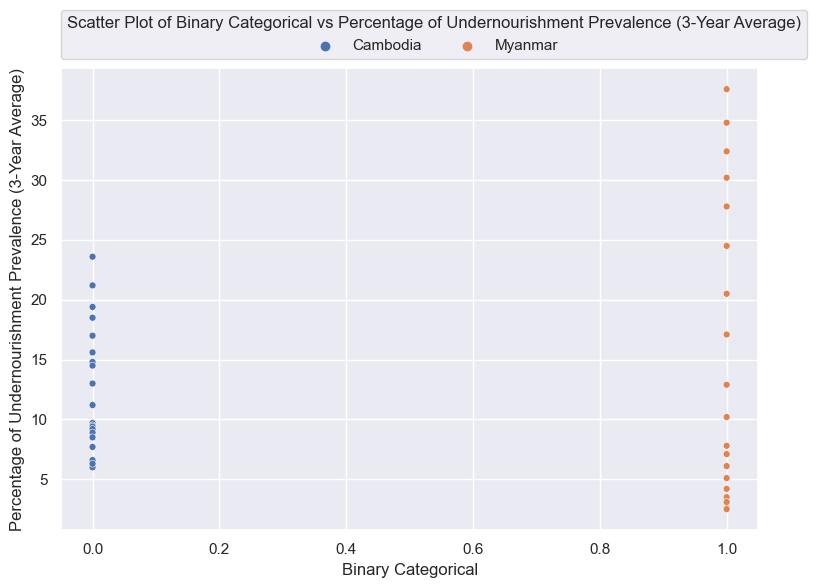

In [152]:
# Scatter Plot of Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Binary Categorical", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "Binary Categorical" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

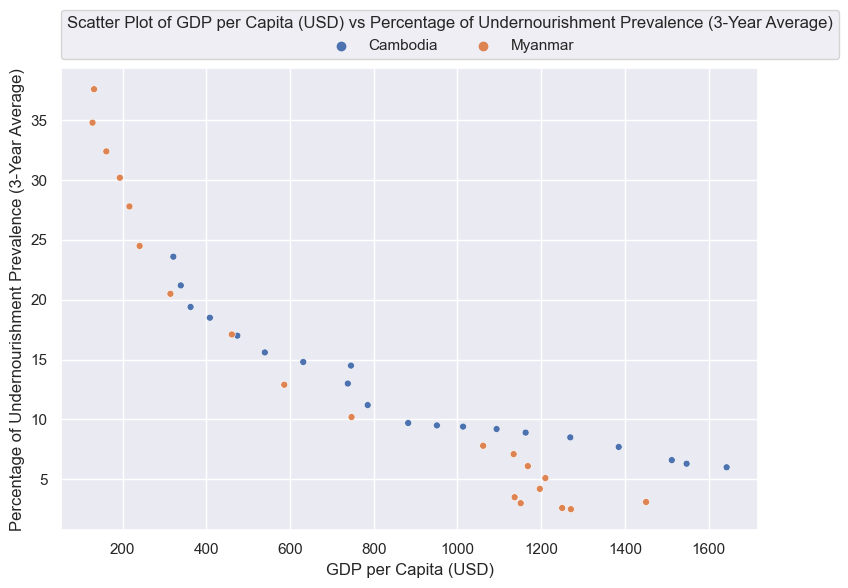

In [153]:
# Scatter Plot of GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "GDP per Capita (USD)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "GDP per Capita (USD)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

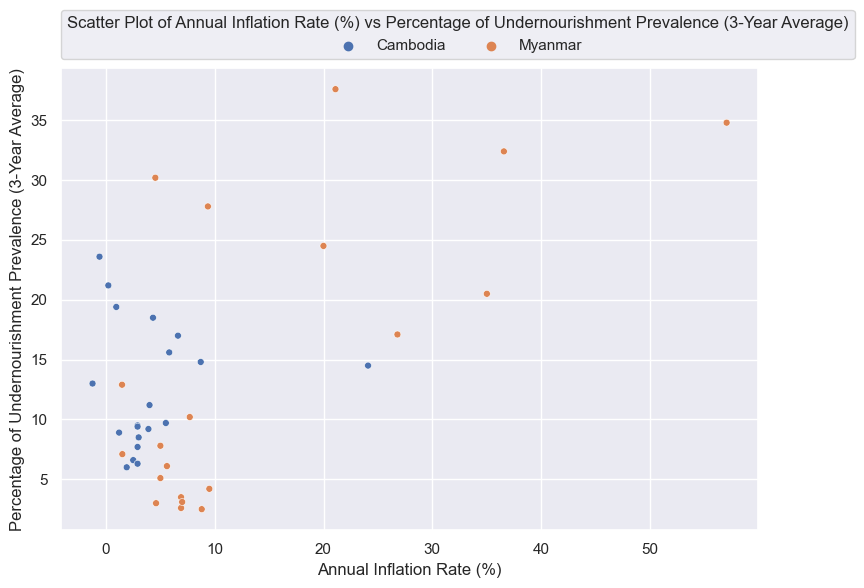

In [154]:
# Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Annual Inflation Rate (%)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "Annual Inflation Rate (%)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

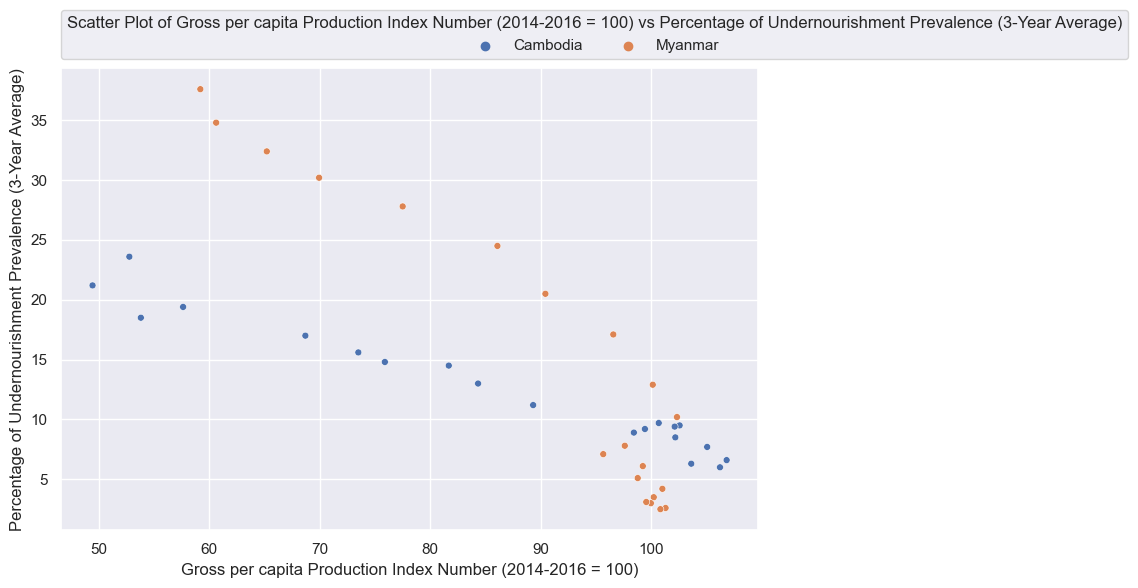

In [155]:
# Gross per capita Production Index Number (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)
# ALL DATA SET 
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Gross per capita Production Index Number (2014-2016 = 100)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df, 
                hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "Gross per capita Production Index Number (2014-2016 = 100)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

Calculating Dataset

$J\left(\hat{\beta}_0, \hat{\beta}_1\right)=\frac{1}{2 m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) \times\left(\hat{y}\left(x^i\right)-y^i\right)$

In [156]:
# Multiple Variables Cost Function
# Set the value of Beta (same size as features added by column vector of 1)
beta_multiple = np.zeros(((X.shape[1]), 1)) #NumPy 1D
J = compute_cost(X, target, beta_multiple)
print(J)

[[105.92546875]]


$\hat{\beta}_0=\hat{\beta}_0-\alpha \frac{1}{m} \Sigma_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_0^i$
<br>

$\hat{\beta}_1=\hat{\beta}_1-\alpha \frac{1}{m} \Sigma_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_1^i$
<br>

$\hat{\beta}_2=\hat{\beta}_2-\alpha \frac{1}{m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_2^i$
<br>

$\cdots$
<br>

$\hat{\beta}_n=\hat{\beta}_n-\alpha \frac{1}{m} \sum_{i=1}^m\left(\hat{y}\left(x^i\right)-y^i\right) x_n^i$
<br>

In [157]:
# Beta After Iterations and J After Iterations
# Set the value of Iterations, Alpha
iterations = 1500
alpha = 0.01

# Call the gradient_descent function
beta_multiple, J_storage_multiple = gradient_descent(X, target, beta_multiple, alpha, iterations)

$\mathbf{X}=\left[\begin{array}{cccc}1 & x_1^1 & \ldots & x_n^1 \\ 1 & x_1^2 & \ldots & x_n^2 \\ \ldots & \ldots & \ldots & \ldots \\ 1 & x_1^m & \ldots & x_n^m\end{array}\right] \in \mathbb{R}^{m \times(n+1)}$

$\hat{\mathbf{b}}=\left[\begin{array}{c}\hat{\beta}_0 \\ \hat{\beta}_1 \\ \cdots \\ \hat{\beta}_n\end{array}\right] \in \mathbb{R}^{n+1}$

$\hat{\mathbf{y}}=\mathbf{X} \times \hat{\mathbf{b}}$

In [158]:
# Predicted Value
# Call the predict() method to get the predicted value of Feature Test
pred = predict(df_features_test, beta_multiple) #NumPy 1D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


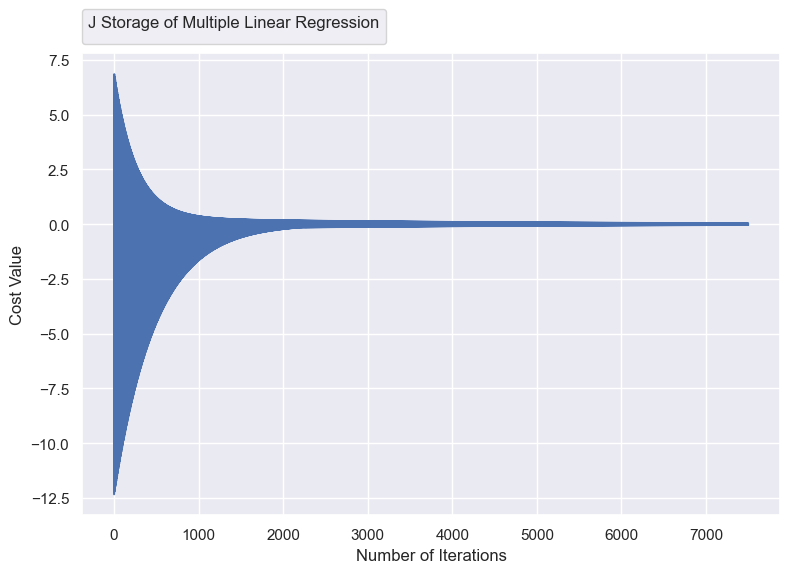

In [159]:
# Plot the graph of Cost Value in each iteration
sns.set()
myplot = sns.lineplot(x=(np.linspace(start=0, stop=len(J_storage_multiple), num=len(J_storage_multiple), endpoint=False)), y=J_storage_multiple)
myplot.set_xlabel('Number of Iterations')
myplot.set_ylabel('Cost Value')
myplot.legend(title = "J Storage of Multiple Linear Regression", 
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

In [160]:
# Index used in test dataset after splitting data
df_plot_index = list(df_features_test.index)

In [161]:
# Comparing Real Value of Test Dataset vs Predicted Value of Test Dataset
df_compare_target_predict = df.loc[df_plot_index, ["Country", "Year", "Percentage of Undernourishment Prevalence (3-Year Average)"]]
df_compare_target_predict["Predicted Percentage of Undernourishment Prevalence (3-Year Average)"] = pred.copy()
df_compare_target_predict = df_compare_target_predict.sort_index(ascending=True)
display(df_compare_target_predict)
df_compare_target_predict = df_compare_target_predict.reset_index(drop=True)
df_compare_target_predict["Features"] = np.linspace(1, len(df_compare_target_predict), num=len(df_compare_target_predict))

,Country,Year,Percentage of Undernourishment Prevalence (3-Year Average),Predicted Percentage of Undernourishment Prevalence (3-Year Average)
0,Cambodia,2001,23.6,17.339191
6,Cambodia,2007,14.8,13.480870
19,Cambodia,2020,6.3,2.887500
20,Myanmar,2001,37.6,18.942454
21,Myanmar,2002,34.8,21.334385
25,Myanmar,2006,24.5,15.862765
34,Myanmar,2015,4.2,5.565346
39,Myanmar,2020,3.1,3.262461


Text(6.1, 35.5, 'Blue: Real Value')

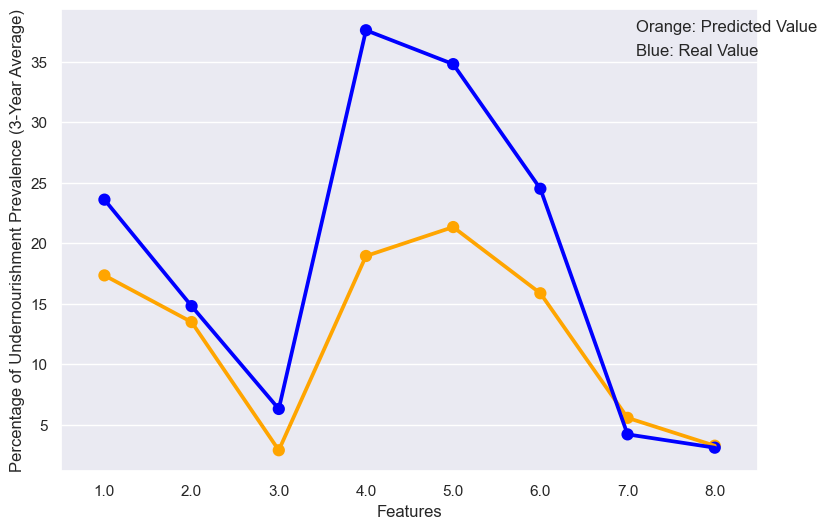

In [162]:
sns.set(rc={'figure.figsize':(9,6)})
sns.pointplot(data=df_compare_target_predict,
            x="Features", y="Predicted Percentage of Undernourishment Prevalence (3-Year Average)", 
            color="orange", label="Real Value")
#plt.annotate("Real Value", (9.4, 8))
sns.pointplot(data=df_compare_target_predict, 
            x="Features", y="Percentage of Undernourishment Prevalence (3-Year Average)", 
            color="blue")
plt.annotate("Orange: Predicted Value", (6.1, 37.5))
plt.annotate("Blue: Real Value", (6.1, 35.5))

Visualizing Dataset in Scatterplot with Seaborn

In [163]:
# Make a new DataFrame for easier visualization

# 1st DataFrame for Real Value
df_plot_1 = df.loc[df_plot_index, :]
real_value_target = df_plot_1.pop("Percentage of Undernourishment Prevalence (3-Year Average)")
df_plot_1["Percentage of Undernourishment Prevalence (3-Year Average)"] = real_value_target
df_plot_1["Value Type"] = ""
df_plot_1.loc[:, "Value Type"] = "Real Value"

# 2nd DataFrame for Predicted Value
df_plot_2 = df.loc[df_plot_index, :]
df_plot_2.pop("Percentage of Undernourishment Prevalence (3-Year Average)")
predicted_value_target = pred
df_plot_2["Percentage of Undernourishment Prevalence (3-Year Average)"] = predicted_value_target
df_plot_2["Value Type"] = ""
df_plot_2.loc[:, "Value Type"] = "Predicted Value"

# Combine Together 1st DataFrame w/ 2nd DataFrame
df_plot = pd.DataFrame(pd.concat([df_plot_1, df_plot_2]))
df_plot = df_plot.sort_index(ascending=True)
display(df_plot)
print(df_plot.shape)

,Country,Year,Binary Categorical,GDP per Capita (USD),Annual Inflation Rate (%),Gross per capita Production Index Number (2014-2016 = 100),Percentage of Undernourishment Prevalence (3-Year Average),Value Type
0,Cambodia,2001,0,321.150224,-0.600648,52.79,23.600000,Real Value
0,Cambodia,2001,0,321.150224,-0.600648,52.79,17.339191,Predicted Value
6,Cambodia,2007,0,631.525258,8.708828,75.90,14.800000,Real Value
6,Cambodia,2007,0,631.525258,8.708828,75.90,13.480870,Predicted Value
19,Cambodia,2020,0,1547.511000,2.900000,103.61,6.300000,Real Value
19,Cambodia,2020,0,1547.511000,2.900000,103.61,2.887500,Predicted Value
20,Myanmar,2001,1,131.715298,21.101305,59.21,37.600000,Real Value
20,Myanmar,2001,1,131.715298,21.101305,59.21,18.942454,Predicted Value
21,Myanmar,2002,1,128.099702,57.074511,60.64,34.800000,Real Value
21,Myanmar,2002,1,128.099702,57.074511,60.64,21.334385,Predicted Value


(16, 8)


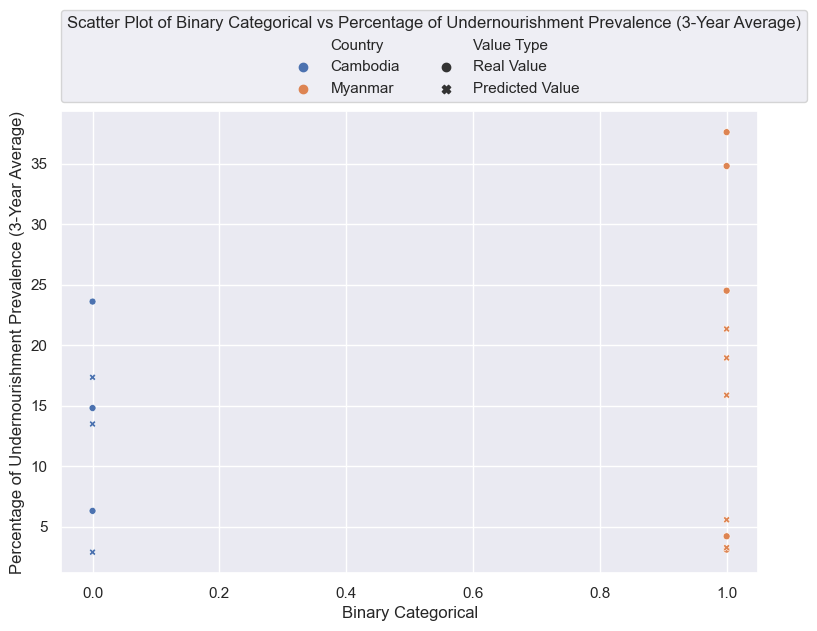

In [164]:
# Scatter Plot of Binary Categorical vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Binary Categorical", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country", s=25)
myplot.legend(title = "Scatter Plot of " + "Binary Categorical" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

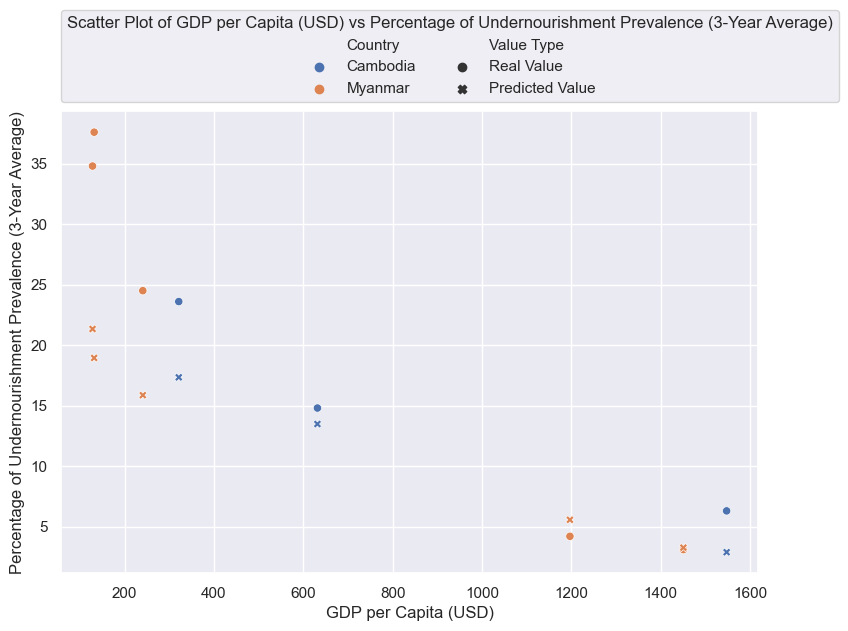

In [165]:
# Scatter Plot of GDP per Capita (USD) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "GDP per Capita (USD)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country")
myplot.legend(title = "Scatter Plot of " + "GDP per Capita (USD)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

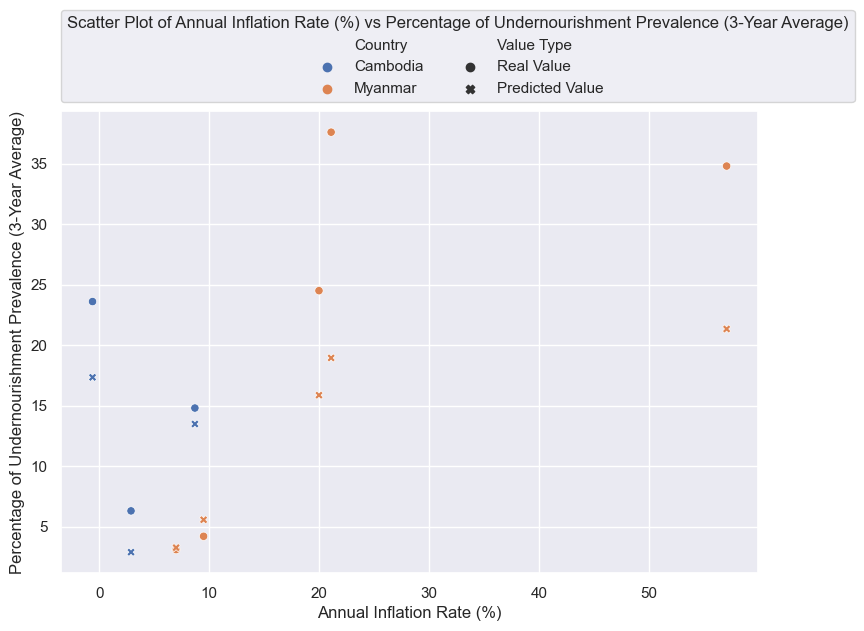

In [166]:
# Scatter Plot of Annual Inflation Rate (%) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Annual Inflation Rate (%)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country")
myplot.legend(title = "Scatter Plot of " + "Annual Inflation Rate (%)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

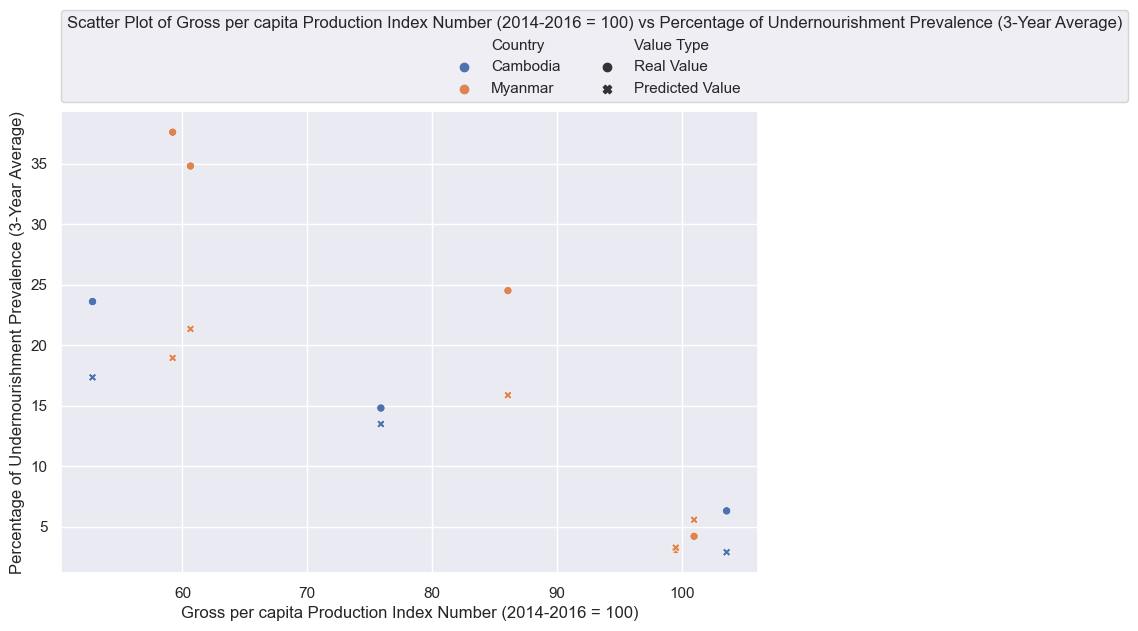

In [167]:
# Scatter Plot of Gross per capita Production Index Number (2014-2016 = 100) vs Percentage of Undernourishment Prevalence (3-Year Average)
# TARGET DATASET
sns.set(rc={'figure.figsize':(9,6)})
myplot = sns.scatterplot(
                x = "Gross per capita Production Index Number (2014-2016 = 100)", y="Percentage of Undernourishment Prevalence (3-Year Average)", data=df_plot, 
                style="Value Type", hue="Country")
myplot.legend(title = "Scatter Plot of " + "Gross per capita Production Index Number (2014-2016 = 100)" + " vs " + "Percentage of Undernourishment Prevalence (3-Year Average)", title_fontsize= 'medium',
        bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
        ncol=2, borderaxespad=0.)

Evaluating Dataset with Metrics

$\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$

In [168]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y=prepare_target(df_target_test), ypred=pred)
print(mse)

82.31277279137163


$R^2=1-\frac{S S_{R E S}}{S S_{T O T}}=1-\frac{\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2}$

In [169]:
# Coefficient of Determination (R²)
# Calculate r2 score by calling a function, the arguments must be a NumPy
r2 = r2_score(y=prepare_target(df_target_test), ypred=pred)
print(r2)

0.4921271819372387


$R_{a d j}^2=1-\frac{\left(1-R^2\right)(n-1)}{n-p-1}$

In [170]:
# Adjusted Coefficient of Determination (Adjusted R²)
# Calculate adjusted r2 score by calling a function, the arguments must be a NumPy for y and ypred
# P is the number of Independent Variables, which are the length of Features list
adjusted_r2 = adjusted_r2_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
print(adjusted_r2)

-0.18503657547977626


$S =\sqrt{1-R_{a d j}^2}\cdot S.D$

$S.D=\sqrt{\frac{\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}{n-1}}$

In [171]:
# Standard Error of (Regression S)
# P is the number of Independent Variables, which are the length of Features list
std_eror_reg = std_error_reg_score(y=prepare_target(df_target_test), ypred=pred, p=len(features))
print(std_eror_reg)

2.91592904019947


Testing Dataset

In [172]:
a1 = df_features.copy() #ALL FEATURES DATASET
a2 = df_target.copy() #ALL TARGET DATASET

a11 = normalize_z(a1) #NORMALIZED ALL FEATURES DATASET
a111 = prepare_feature(a11) #PREPARED NORMALIZED ALL FEATURES DATASET

a22 = prepare_target(a2) #PREPARED 
print(a111.shape, a22.shape)

(40, 5) (40, 1)


In [173]:
b1 = np.zeros(((a111.shape[1]), 1))
print(b1.shape)

b1, J1 = gradient_descent(a111, a22, b1, alpha, iterations)
print(b1)

(5, 1)
[[13.58999615]
 [-0.3011703 ]
 [-5.4237088 ]
 [ 2.17695755]
 [-2.51537078]]


In [174]:
pred1 = predict(a1, b1)

In [175]:
adjusted_r2 = adjusted_r2_score(y=prepare_target(a2), ypred=pred1, p=4)
print(adjusted_r2)

0.8464383373977862


In [176]:
r2 = r2_score(y=prepare_target(a2), ypred=pred1)
print(r2)

0.8621882515108338
